# Análisis exploratorio de los datos


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Air Quality

### Importamos los datos

In [11]:
aire = pd.read_csv(r'C:\Users\maxyf\Downloads\air_quality.csv')
aire

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9,NaN
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7,NaN
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4,NaN
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8,NaN


### Comprobamos nulos


In [12]:
aire.isnull().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64

Podemos ver que en la columna Message todos sus datos son nulos. Podria eliminarse para reducir el tamaño del DataFrame

In [13]:
aire[aire.duplicated(keep=False)]

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message


Podemos ver que no hay datos duplicados

In [14]:
aire.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value,Message
count,18025.000000,18025.000000,1.801600e+04,18025.000000,0.0
mean,426387.692705,434.830180,5.906303e+05,21.428616,NaN
std,250489.450630,115.852371,7.769549e+06,23.999345,NaN
min,121644.000000,365.000000,1.000000e+00,0.000000,NaN
25%,175303.000000,365.000000,2.020000e+02,8.900000,NaN
50%,410803.000000,375.000000,3.030000e+02,15.200000,NaN
75%,649893.000000,386.000000,4.040000e+02,26.700000,NaN
max,828353.000000,661.000000,1.051061e+08,424.700000,NaN


In [15]:
aire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB


### Buscamos Outliers 

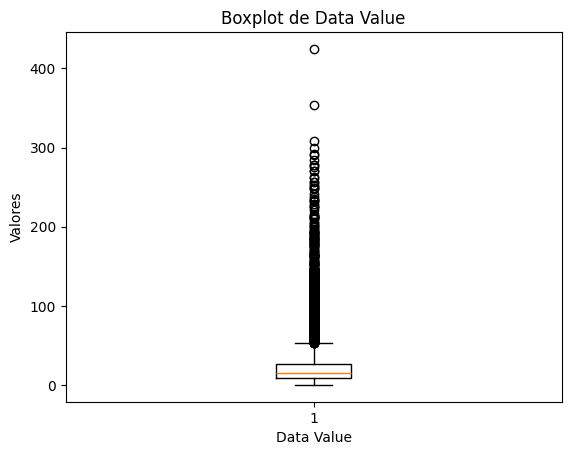

In [16]:
plt.boxplot(aire['Data Value'])
plt.title('Boxplot de Data Value')
plt.xlabel('Data Value')
plt.ylabel('Valores')
plt.show()

### Distribucion de Data Value

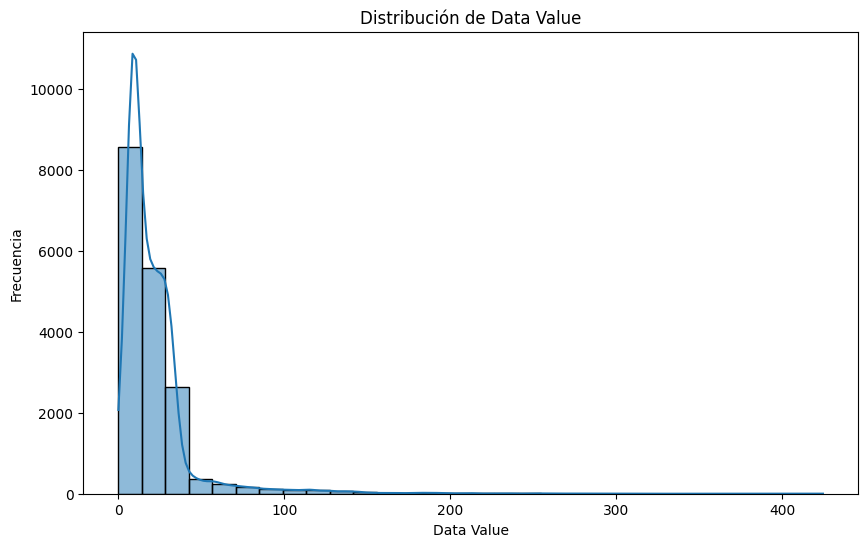

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(aire['Data Value'], bins=30, kde=True)
plt.title('Distribución de Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frecuencia')
plt.show()

##### Hacemos una copia de los datos para no cambiar los originales

In [18]:
df = aire.copy()

### Analizamos el periodo de tiempo


In [19]:
df['year'] = df['Time Period'].str.extract(r'(\d{4})')

In [20]:
df = df.sort_values(by='year', ascending=True)

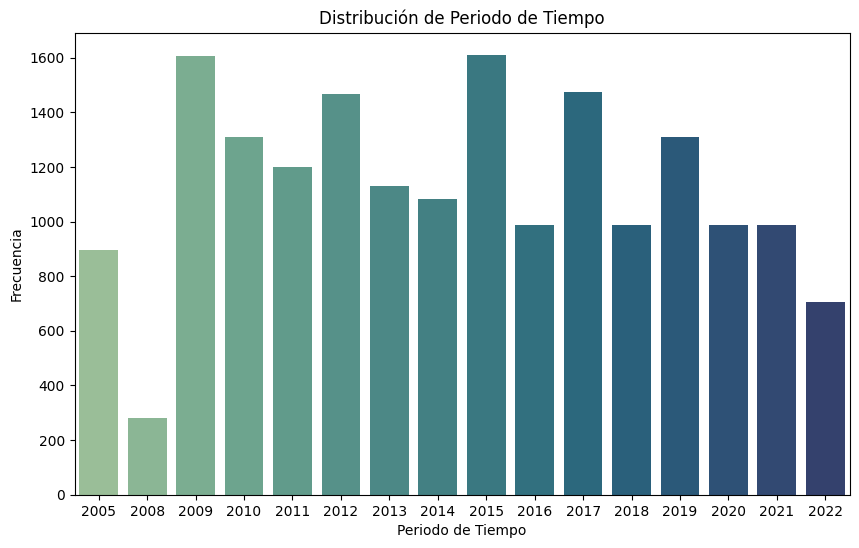

In [21]:
# Contamos las frecuencias de cada valor único en la columna 'year'
year_counts = df['year'].value_counts().sort_index()  # Ordenamos por el valor de 'year'

# Crear un barplot usando seaborn
plt.figure(figsize=(10, 6))

sns.barplot(x=year_counts.index, y=year_counts.values, palette="crest")

# Títulos y etiquetas
plt.title('Distribución de Periodo de Tiempo')
plt.xlabel('Periodo de Tiempo')
plt.ylabel('Frecuencia')

# Mostrar gráfico
plt.show()

Podemos ver una tendencia baja y en 2009 se de un pico alto vemos que tiende a bajar a lo largo de los años con algunos picos en años como 2012, 2015 (pico mas alto), 2017 y 2019

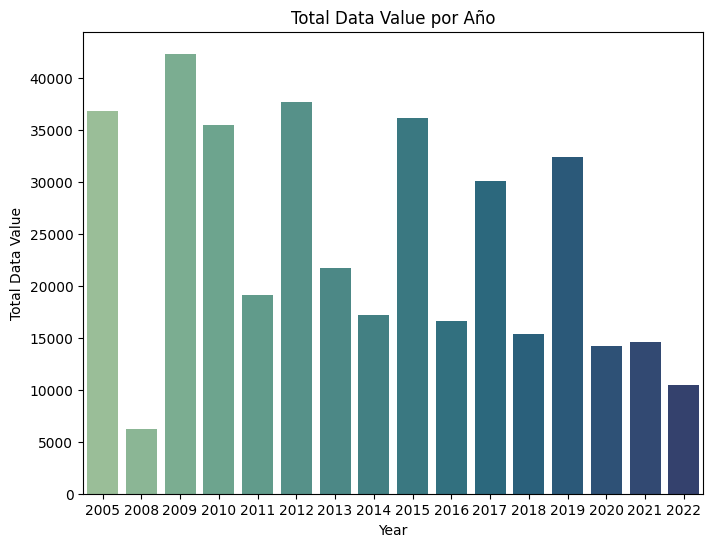

In [22]:
# Agrupar por 'year' y sumar los valores de 'Data Value'
df_grouped = df.groupby('year')['Data Value'].sum().reset_index()

# Establecer la paleta de colores 'crest' de seaborn


# Crear gráfico de barras (barplot)
plt.figure(figsize=(8, 6))
sns.barplot(x='year', y='Data Value', data=df_grouped, palette='crest')

# Añadir etiquetas y título
plt.xlabel('Year')
plt.ylabel('Total Data Value')
plt.title('Total Data Value por Año')

# Mostrar el gráfico
plt.show()

Podemos ver un pico de Data Value en el año 2005, luego en el año 2008 vemos el registro mas bajo el cual al otro año llega a su mayor pico de registros que luego tiende a bajar con algunos picos en los años 2012, 2015, 2017 y 2019

### Analisis Categórico


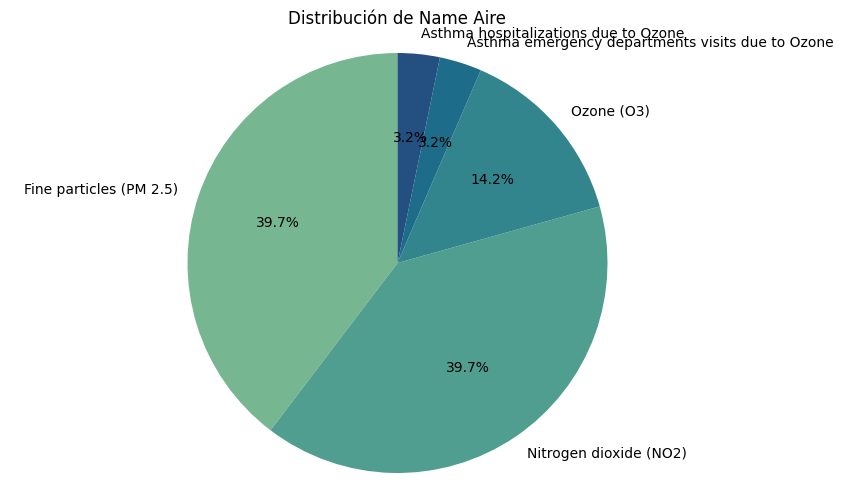

In [23]:
# Contamos las frecuencias de las categorías más comunes en 'Name'
name_aire = aire['Name'].value_counts().head(5)

# Crear el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(name_aire, labels=name_aire.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest", len(name_aire)))

# Títulos y etiquetas
plt.title('Distribución de Name Aire')
plt.axis('equal') 

# Mostrar gráfico
plt.show()

### Analisis geográfico

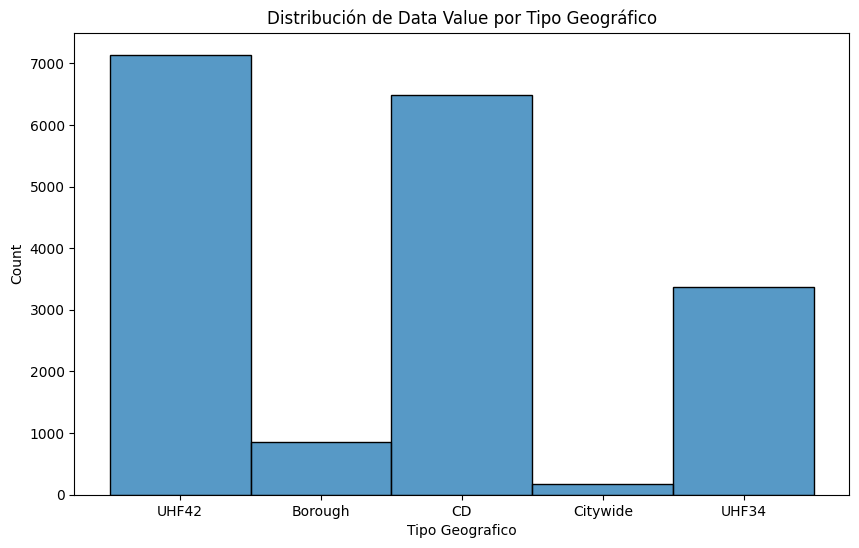

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Geo Type Name'], bins=30, discrete=True)
plt.title('Distribución de Data Value por Tipo Geográfico')
plt.xlabel('Tipo Geografico')
plt.show()

UHF 42: Sistema de clasificación en la que New York esta dividida en 42 areas de salud llamada Unidades de Área de Salud Pública

Borougth: Son los 5 condados en los que esta dividido New York (Manhattan, Brooklyn, Queens, Bronx y Staten Island)

CD: Distritos Comunitarios (Divisiones de Borougth)

Citywide: Análisis a nivel de toda la ciudad

UHF 34: Sistema de clasificación en la que New York esta dividida en 34 areas de salud llamada Unidades de Área de Salud Pública

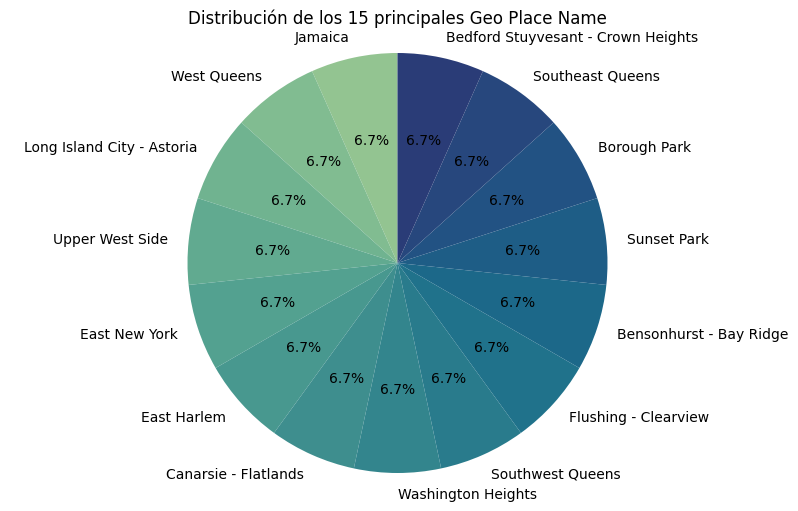

In [25]:
# Contamos las frecuencias de las categorías más comunes en 'Geo Place Name'
top_places = df['Geo Place Name'].value_counts().head(15)

# Crear el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(top_places, labels=top_places.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("crest", len(top_places)))

# Títulos y etiquetas
plt.title('Distribución de los 15 principales Geo Place Name')
plt.axis('equal') 

# Mostrar gráfico
plt.show()

Podemos ver que la division de los datos es igual para cada barrio

### Matriz de Correlación 

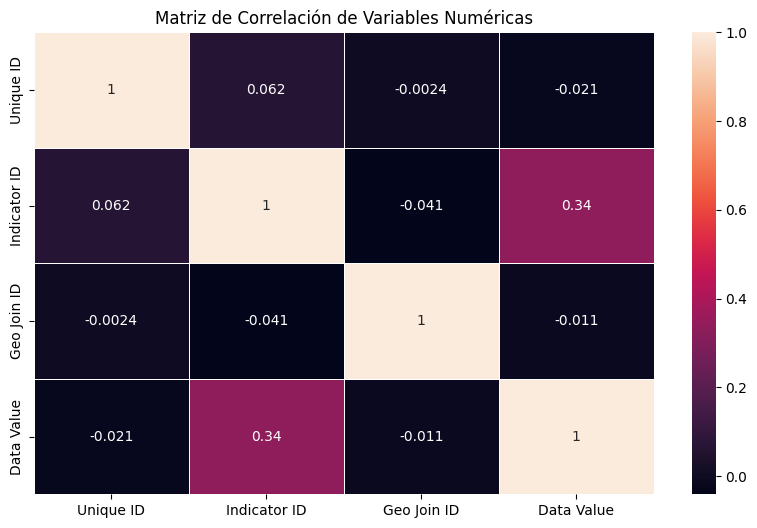

In [26]:
# Filtrar solo las columnas numéricas
aire_numeric = aire.select_dtypes(include=['number'])
# Verificar si alguna columna tiene todos los valores NaN y eliminarla
aire_numeric = aire_numeric.dropna(axis=1, how='all')
# Calcular la matriz de correlación
correlation_matrix = aire_numeric.corr()
# Crear un heatmap para visualizar la correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

Observaciones:
- Hay presencia de valores nulos en Geo Type Name  y Geo Join ID (9) y en Messages en el que todos sus datos son nulos
- No hay valores duplicados

## Noise Polution


### Importamos los datos

In [27]:
noise = pd.read_csv(r'C:\Users\maxyf\Downloads\noise_pollution.csv')
noise

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,test,0,00_026884.wav,-6,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,1,0,-1,-1,-1,-1,-1
1,test,0,00_026884.wav,-4,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2,test,0,00_026884.wav,-3,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,test,0,00_026884.wav,-1,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,test,0,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62017,validate,46,46_020807.wav,5399,1,559,40.73365,-73.98879,2018,42,...,-1,-1,0,0,0,0,1,0,0,0
62018,validate,46,46_020807.wav,5424,1,559,40.73365,-73.98879,2018,42,...,-1,-1,0,0,0,0,1,0,1,0
62019,validate,46,46_020853.wav,5337,1,559,40.73365,-73.98879,2018,34,...,far,-1,0,0,0,0,0,0,1,0
62020,validate,46,46_020853.wav,5365,1,559,40.73365,-73.98879,2018,34,...,-1,-1,0,0,0,0,0,0,0,0


### Buscamos nulos

In [28]:
noise.isnull().sum()

split                      0
sensor_id                  0
audio_filename             0
annotator_id               0
borough                    0
                          ..
4_powered-saw_presence     0
5_alert-signal_presence    0
6_music_presence           0
7_human-voice_presence     0
8_dog_presence             0
Length: 78, dtype: int64

Se puede ver que no hay nulos en ninguna columna

In [29]:
noise[noise.duplicated(keep=False)]

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence


Podemos ver que no hay datos duplicados

In [30]:
noise.describe()

,sensor_id,annotator_id,borough,block,latitude,longitude,year,week,day,hour,...,7-X_other-unknown-human-voice_presence,8-1_dog-barking-whining_presence,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
count,62022.000000,62022.000000,62022.000000,62022.000000,62022.00000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,...,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000
mean,20.222066,3041.794234,1.114943,593.343878,40.73031,-73.993044,2017.591000,26.274838,2.907259,12.417578,...,-0.041969,-0.040437,0.234562,0.010045,-0.024233,-0.030151,0.085437,-0.028409,0.200026,-0.040437
std,14.297138,1981.714943,0.472653,251.373182,0.01348,0.010074,0.778948,16.169650,1.925728,5.824993,...,0.281874,0.344264,0.544790,0.390565,0.343185,0.357747,0.470785,0.357258,0.532167,0.344264
min,0.000000,-6.000000,1.000000,75.000000,40.67517,-74.015760,2016.000000,1.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.000000,639.000000,1.000000,535.000000,40.72898,-73.996820,2017.000000,12.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,3743.000000,1.000000,547.000000,40.73033,-73.995000,2017.000000,27.000000,3.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,4623.000000,1.000000,550.000000,40.73142,-73.992860,2018.000000,41.000000,4.000000,17.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,61.000000,6659.000000,4.000000,2613.000000,40.77991,-73.851840,2019.000000,52.000000,6.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62022 entries, 0 to 62021
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   split                                         62022 non-null  object 
 1   sensor_id                                     62022 non-null  int64  
 2   audio_filename                                62022 non-null  object 
 3   annotator_id                                  62022 non-null  int64  
 4   borough                                       62022 non-null  int64  
 5   block                                         62022 non-null  int64  
 6   latitude                                      62022 non-null  float64
 7   longitude                                     62022 non-null  float64
 8   year                                          62022 non-null  int64  
 9   week                                          62022 non-null 

### Graficamos los datos

In [32]:
noise['1_engine_presence'].value_counts()

1_engine_presence
 0    40202
 1    18184
-1     3636
Name: count, dtype: int64

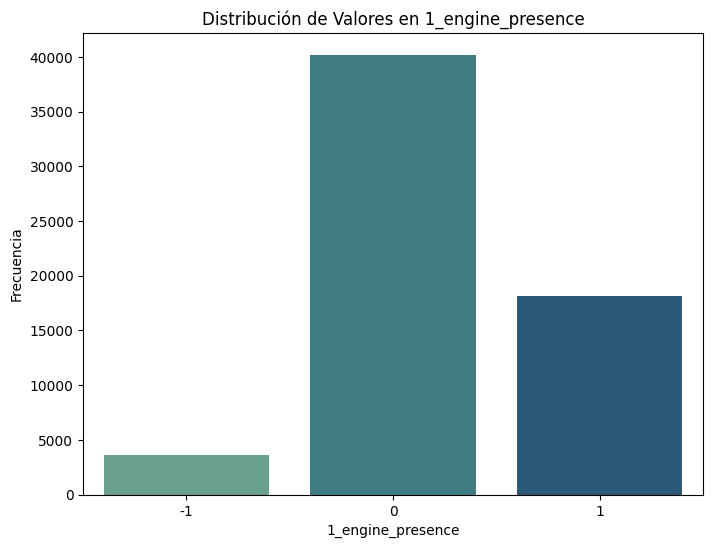

In [33]:
# Calcular las frecuencias de los valores en '1_engine_presence'
frequency = noise['1_engine_presence'].value_counts().reset_index()
frequency.columns = ['1_engine_presence', 'count']

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='1_engine_presence', y='count', data=frequency,palette='crest')

# Títulos y etiquetas
plt.title('Distribución de Valores en 1_engine_presence')
plt.xlabel('1_engine_presence')
plt.ylabel('Frecuencia')

# Mostrar gráfico
plt.show()

- 1: Si está presente 
- 0: No está presente
- -1 : No se etiquetó ya que la anotación fue realizada por un miembro de SONYC 


In [34]:
noise['1-1_small-sounding-engine_presence'].value_counts()

1-1_small-sounding-engine_presence
 0    56323
-1     3636
 1     2063
Name: count, dtype: int64

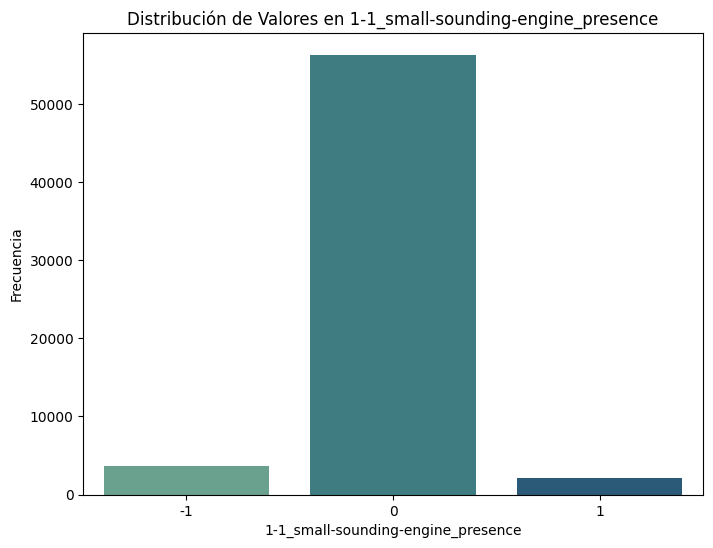

In [35]:
# Calcular las frecuencias de los valores en '1-1_small-sounding-engine_presence'
frequency = noise['1-1_small-sounding-engine_presence'].value_counts().reset_index()
frequency.columns = ['1-1_small-sounding-engine_presence', 'count']

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='1-1_small-sounding-engine_presence', y='count', data=frequency,palette='crest')

# Títulos y etiquetas
plt.title('Distribución de Valores en 1-1_small-sounding-engine_presence')
plt.xlabel('1-1_small-sounding-engine_presence')
plt.ylabel('Frecuencia')

# Mostrar gráfico
plt.show()

- 1: Si está presente 
- 0: No está presente
- -1 : No se etiquetó ya que la anotación fue realizada por un miembro de SONYC 

In [36]:
noise['1-2_medium-sounding-engine_presence'].value_counts()

1-2_medium-sounding-engine_presence
 0    51639
 1     6747
-1     3636
Name: count, dtype: int64

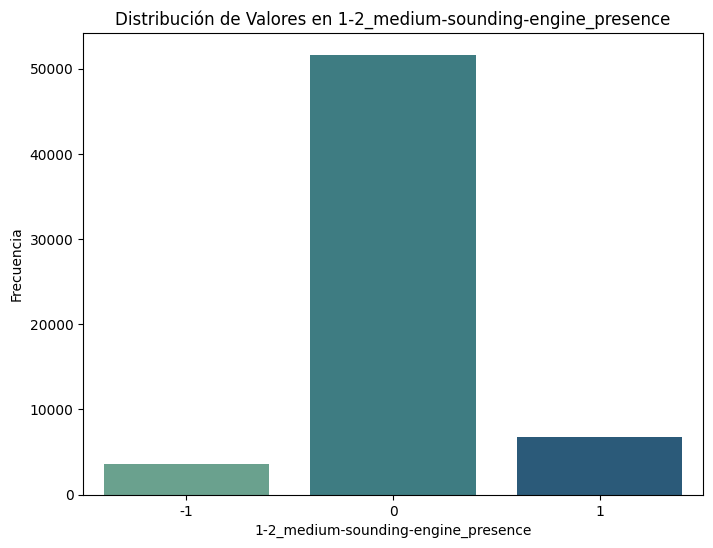

In [37]:
# Calcular las frecuencias de los valores en '1-1_small-sounding-engine_presence'
frequency = noise['1-2_medium-sounding-engine_presence'].value_counts().reset_index()
frequency.columns = ['1-2_medium-sounding-engine_presence', 'count']

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='1-2_medium-sounding-engine_presence', y='count', data=frequency,palette='crest')

# Títulos y etiquetas
plt.title('Distribución de Valores en 1-2_medium-sounding-engine_presence')
plt.xlabel('1-2_medium-sounding-engine_presence')
plt.ylabel('Frecuencia')

# Mostrar gráfico
plt.show()

- 1: Si está presente 
- 0: No está presente
- -1 : No se etiquetó ya que la anotación fue realizada por un miembro de SONYC 

In [38]:
noise['1-X_engine-of-uncertain-size_presence'].value_counts()

1-X_engine-of-uncertain-size_presence
 0    55784
-1     3636
 1     2602
Name: count, dtype: int64

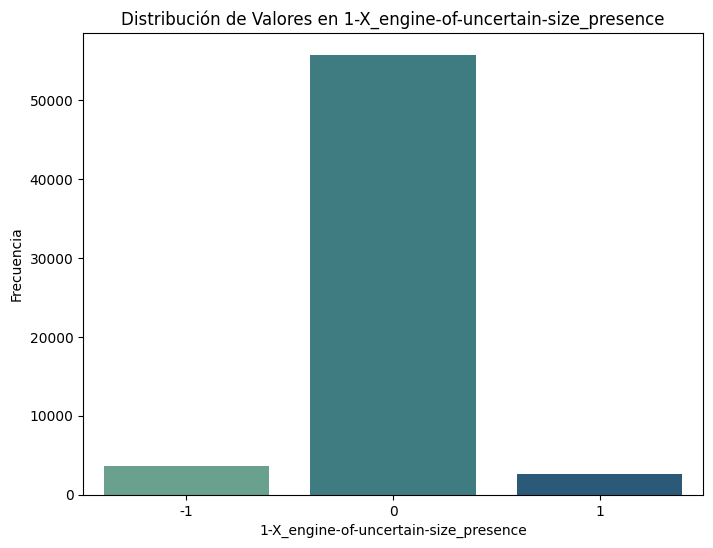

In [39]:
# Calcular las frecuencias de los valores en '1-1_small-sounding-engine_presence'
frequency = noise['1-X_engine-of-uncertain-size_presence'].value_counts().reset_index()
frequency.columns = ['1-X_engine-of-uncertain-size_presence', 'count']

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='1-X_engine-of-uncertain-size_presence', y='count', data=frequency,palette='crest')

# Títulos y etiquetas
plt.title('Distribución de Valores en 1-X_engine-of-uncertain-size_presence')
plt.xlabel('1-X_engine-of-uncertain-size_presence')
plt.ylabel('Frecuencia')

# Mostrar gráfico
plt.show()

- 1: Si está presente 
- 0: No está presente
- -1 : No se etiquetó ya que la anotación fue realizada por un miembro de SONYC 

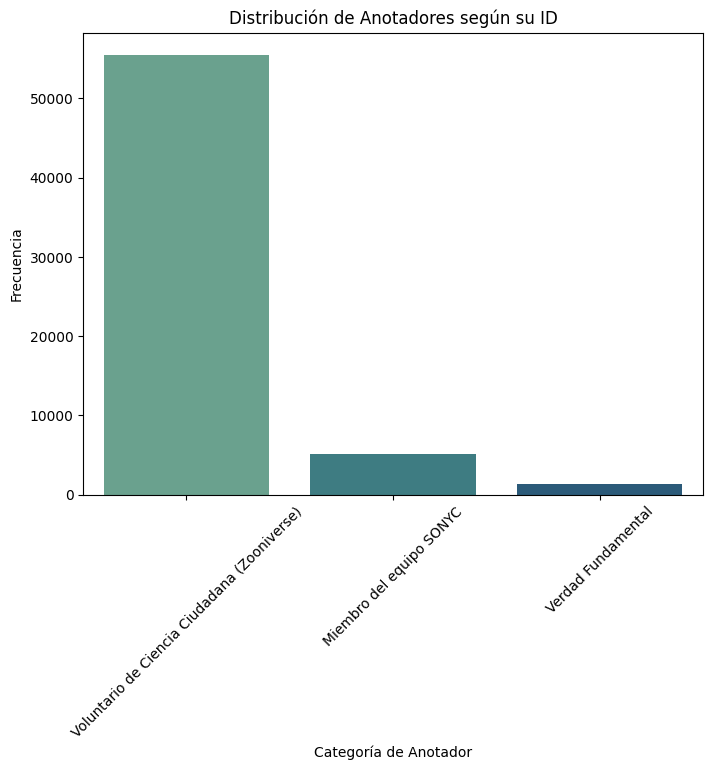

In [40]:
# Crear una columna categórica para representar los tipos de anotadores
def categorize_annotator(annotator_id):
    if annotator_id > 0:
        return 'Voluntario de Ciencia Ciudadana (Zooniverse)'
    elif annotator_id < 0:
        return 'Miembro del equipo SONYC'
    elif annotator_id == 0:
        return 'Verdad Fundamental'

# Aplicar la función al DataFrame para categorizar los anotadores
noise['annotator_category'] = noise['annotator_id'].apply(categorize_annotator)

# Contar la frecuencia de cada categoría de anotador
category_counts = noise['annotator_category'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='crest')

# Agregar etiquetas y título
plt.title('Distribución de Anotadores según su ID')
plt.xlabel('Categoría de Anotador')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Segun el diccionario de los datos si el ID anónimo del anotador es positivo, es un voluntario de ciencia ciudadana de la plataforma Zooniverse. Si es negativo, es un miembro del equipo de SONYC. Si es 0, entonces es la verdad fundamental acordada por el equipo de SONYC.

Gracias a esto podemos ver que:  
- Mas de 50.000 anotadores son voluntarios de ciencia ciudadana de la plataforma Zooniverse
- Alrededor de 5.000 anotadores son Miembros del equipo SONYC
- Y menos de 2.000 es la verdad fundamental acordada por el equipo de SONYC

### Distribucion por fecha


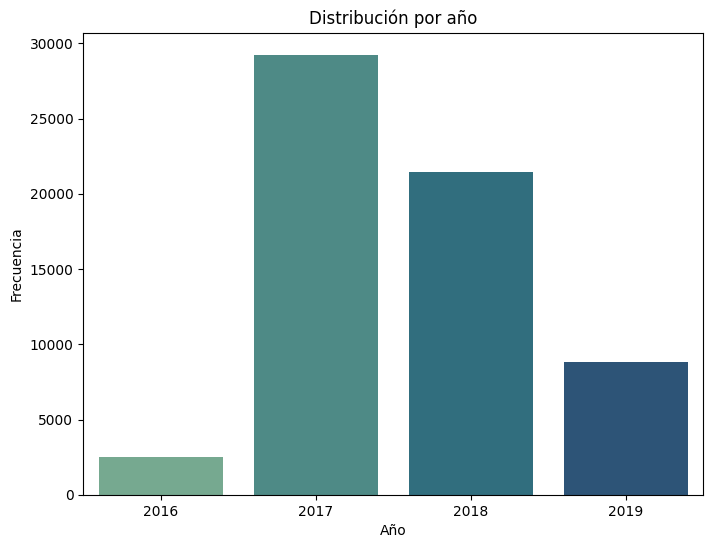

In [41]:

# Contamos las frecuencias de cada valor único en 'year'
year_counts = noise['year'].value_counts().sort_index() 

# Crear un barplot 
plt.figure(figsize=(8, 6))

sns.barplot(x=year_counts.index, y=year_counts.values, palette="crest")

# Ajustar el formato del eje x para que solo aparezcan enteros
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Títulos y etiquetas
plt.title('Distribución por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar gráfico
plt.show()

Podemos ver un pico claro en el año 2017 que luego tiende a bajar a lo largo de los años


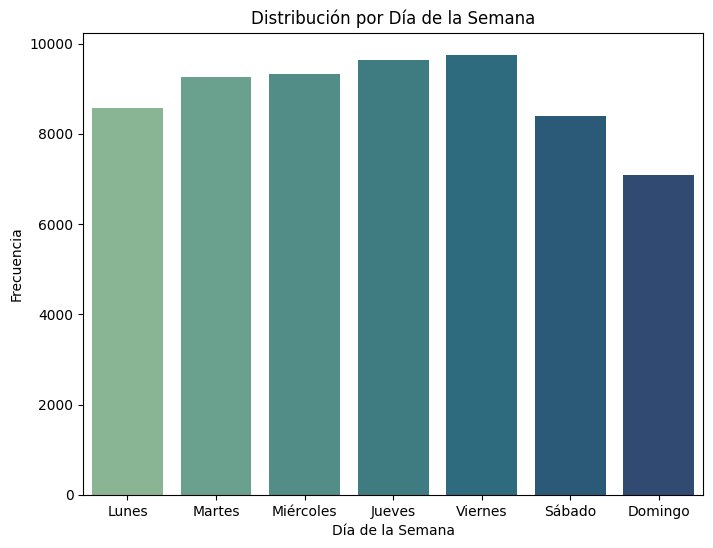

In [42]:
# Crear un diccionario que mapea los números de días a los nombres de los días
dia = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Crear un nuevo DataFrame con la columna 'day' mapeada a los días de la semana
noise_dias = noise.copy() 
noise_dias['day_name'] = noise_dias['day'].map(dia)

# Convertir la columna 'day_name' a tipo categórico con el orden especificado
noise_dias['day_name'] = pd.Categorical(noise_dias['day_name'], categories=orden, ordered=True)

# Contamos las frecuencias de cada día de la semana
day_counts = noise_dias['day_name'].value_counts().sort_index() 

plt.figure(figsize=(8, 6))

sns.barplot(x=day_counts.index, y=day_counts.values, palette="crest")

# Ajustar el formato del eje x para que solo muestre los días de la semana
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('Distribución por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')

plt.show()

Podemos ver una tendencia alta en la semana la cual los fines de semana tiende a bajar

### Análisis Geografico

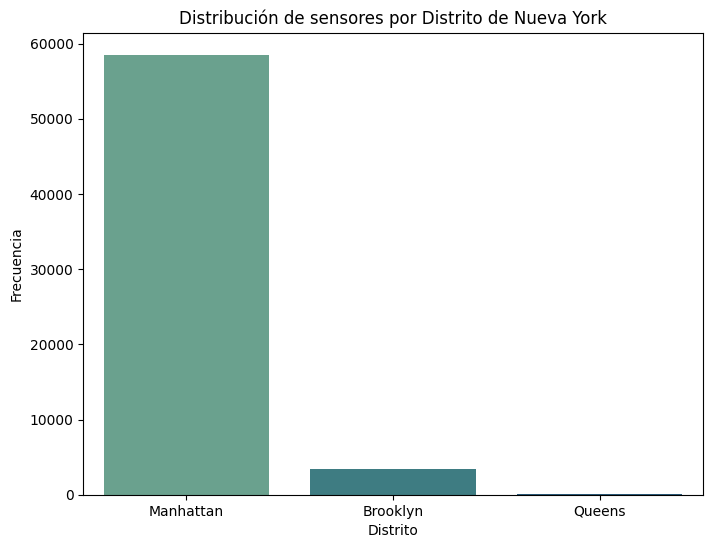

In [43]:
borough_mapping = {
    1: 'Manhattan',
    3: 'Brooklyn',
    4: 'Queens'
}

noise_copia = noise.copy()

# Asignamos el nombre del borough basado en el diccionario
noise_copia['borough_name'] = noise_copia['borough'].map(borough_mapping)

borough_counts = noise_copia['borough_name'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=borough_counts.index, y=borough_counts.values, palette='crest')  
plt.title('Distribución de sensores por Distrito de Nueva York')
plt.xlabel('Distrito')
plt.ylabel('Frecuencia')
plt.show()


Se puede ver claramente que en Manhattan es donde mas sensores podemos encontrar

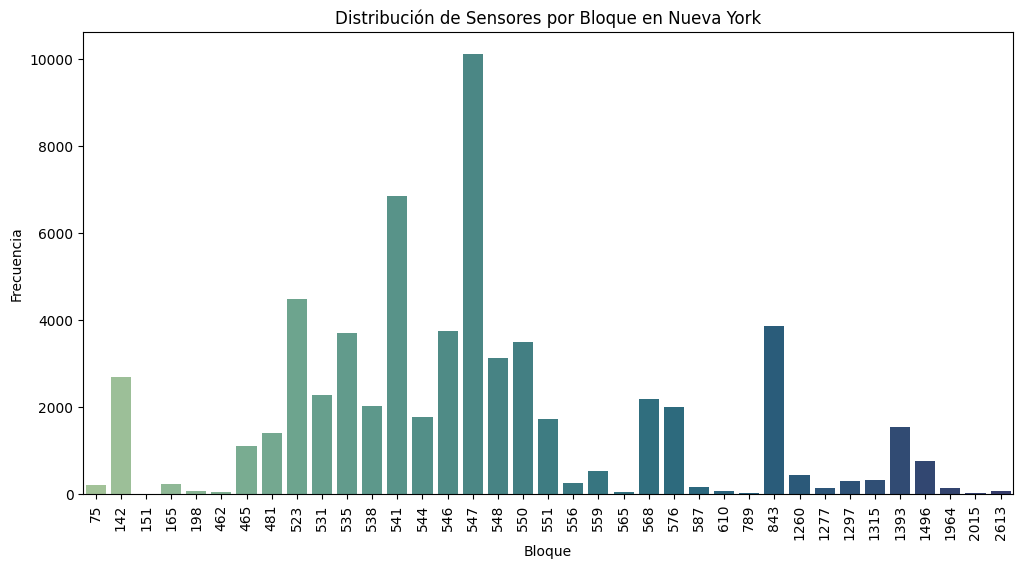

In [44]:
# Contar las ocurrencias de cada valor en la columna 'block'
block_counts = noise['block'].value_counts()

# Graficar la distribución de la columna 'block' usando un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=block_counts.index, y=block_counts.values, palette='crest')  # Puedes cambiar la paleta de colores
plt.title('Distribución de Sensores por Bloque en Nueva York')
plt.xlabel('Bloque')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si son muchas
plt.show()

En este grafico podemos ver en que bloque hay mas sensores y representa un claro pico en el bloque 547 seguido por el 541 y el 523

#### Mapa de Correlación

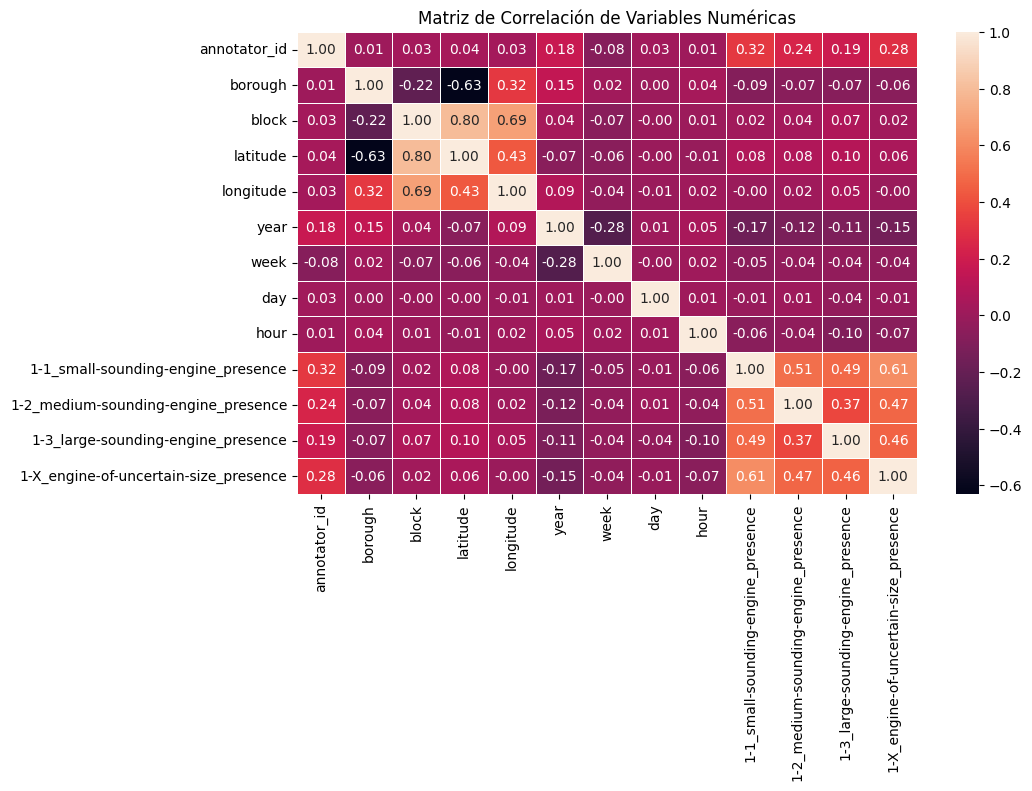

In [45]:
corre = noise.iloc[:, 3:16].dropna().corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corre, annot=True,fmt="0.2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

### Observaciones

- No hay duplicados
- No hay nulos
- A la hora de realizar el ETL se van a dejar los datos de numericos que representen una palabra se van a dejar así para el Machine Learning y luego esos datos van a ser transformados para la visualizacion 